# Jupyter Notebook to explore the data and share it with Firestore

## Data exploring

In [107]:
# Importing useful libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [76]:
# Import the example dataset in a pandas dataframe
data = pd.read_csv("../data/example_data.csv") 


In [77]:
# Display the data
data.head(5)

,Subfund_Code,Share_Class_Code,Valuation_Date,Subfund_CCY,Net_Asset_Value,Nb_Shares_Outstanding,NAV_Per_Share,CCY_NAV_share,ISIN_Code,Nb_Shares_Subscribed,Amount_Subscribed,Nb_Shares_Redeemed,Amount_Redeemed,Subfund_Long_Name,Dividend_Per_Share,Dividend_Payment_Date,Dividend_PCCY,Dividend_Payment_CCY,Dividend_Subfund_CCY,Total_Net_Assets
0,1,A,02/01/2018,EUR,53472989.09,564961.4266,111.6870,EUR,LU1234DEMO1A,0.0000,0.0000,0.0000,0.0000,NaN,0.0,0.0,0,0,EUR,53472989.09
1,1,A,03/01/2018,EUR,53615728.16,564974.2414,111.9820,EUR,LU1234DEMO1A,0.0000,0.0000,0.0000,0.0000,NaN,0.0,0.0,0,0,EUR,53615728.16
2,1,A,04/01/2018,EUR,53706892.15,565337.9646,112.1000,EUR,LU1234DEMO1A,0.0000,0.0000,0.0000,0.0000,NaN,0.0,0.0,0,0,EUR,53706892.15
3,1,A,05/01/2018,EUR,53946703.05,566130.6532,112.4422,EUR,LU1234DEMO1A,25.7948,2441.5616,12.9800,1228.5452,NaN,0.0,0.0,0,0,EUR,53946703.05
4,1,A,08/01/2018,EUR,54051911.14,566282.0000,112.6310,EUR,LU1234DEMO1A,549.7030,52166.4902,185.9798,17649.3662,NaN,0.0,0.0,0,0,EUR,54051911.14


In [163]:
2441.5616/25.7948

94.65324794144557

In [164]:
1228.5452/12.9800

94.6490909090909

In [78]:
data.describe()

,Subfund_Code,Net_Asset_Value,Nb_Shares_Outstanding,NAV_Per_Share,Nb_Shares_Subscribed,Amount_Subscribed,Nb_Shares_Redeemed,Amount_Redeemed,Subfund_Long_Name,Dividend_Per_Share,Dividend_Payment_Date,Dividend_PCCY,Total_Net_Assets
count,2542.000000,2.542000e+03,2.542000e+03,2542.000000,2542.000000,2.542000e+03,2542.000000,2.542000e+03,0.0,2542.000000,2542.000000,2542.0,2.542000e+03
mean,1.801731,3.394277e+08,3.232240e+06,379.033129,2145.204749,2.904312e+05,4959.589456,4.683472e+05,NaN,0.006541,542.403572,0.0,3.394277e+08
std,0.743348,3.985079e+08,3.966065e+06,755.335554,12710.538732,2.207844e+06,17712.849893,2.329461e+06,NaN,0.100973,5235.959859,0.0,3.985079e+08
min,1.000000,1.174690e+02,1.180000e+00,33.370400,0.000000,0.000000e+00,0.000000,0.000000e+00,NaN,0.000000,0.000000,0.0,1.174690e+02
25%,1.000000,1.599386e+07,1.209026e+05,105.565750,0.000000,0.000000e+00,0.000000,0.000000e+00,NaN,0.000000,0.000000,0.0,1.599386e+07
50%,2.000000,2.602002e+08,5.679709e+05,120.348200,0.000000,0.000000e+00,0.000000,0.000000e+00,NaN,0.000000,0.000000,0.0,2.602002e+08
75%,2.000000,5.203370e+08,5.816585e+06,195.378500,644.253450,1.941963e+04,5222.659350,1.299846e+05,NaN,0.000000,0.000000,0.0,5.203370e+08
max,3.000000,1.439665e+09,1.146561e+07,2870.822000,377702.624600,6.191460e+07,679271.177200,8.636259e+07,NaN,4.484000,51268.640000,0.0,1.439665e+09


In [79]:
# Explore what are the distinct values for relevant columns
for col in ['Subfund_Code', 'Share_Class_Code', 'Subfund_CCY', 'CCY_NAV_share', 'ISIN_Code', 'Subfund_Long_Name', 'Dividend_PCCY', 'Dividend_Payment_CCY', 'Dividend_Subfund_CCY']:
    print("Unique values for the column", col, str(data[col].unique()))

Unique values for the column Subfund_Code [1 2 3]
Unique values for the column Share_Class_Code ['A' 'B' 'C' 'D' 'E']
Unique values for the column Subfund_CCY ['EUR' 'USD' 'NOK']
Unique values for the column CCY_NAV_share ['EUR' 'SGD' 'CZK' 'USD' 'NOK']
Unique values for the column ISIN_Code ['LU1234DEMO1A' 'LU1234DEMO1B' 'LU1234DEMO1C' 'LU1234DEMO1D'
 'LU1234DEMO2A' 'LU1234DEMO2B' 'LU1234DEMO2C' 'LU1234DEMO2D'
 'LU1234DEMO2E' 'LU1234DEMO3A' 'LU1234DEMO3B']
Unique values for the column Subfund_Long_Name [nan]
Unique values for the column Dividend_PCCY [0]
Unique values for the column Dividend_Payment_CCY ['0' 'EUR' 'SGD' 'USD']
Unique values for the column Dividend_Subfund_CCY ['EUR' 'USD' 'NOK']


**We can already notice that Dividend_PCCY and Subfund_Long_Name are useless columns.**

## Data Checks

### We want to check that there is only 1 NAV_Per_Share per Subfund_Code, Share_Class_Code and Valuation_Date

In [80]:
# First we aggregate the data by those columns and we take the max
data_grouped=data.groupby(["Subfund_Code", "Share_Class_Code", "Valuation_Date"], as_index=False)['NAV_Per_Share'].count()
print("Max number of lines for the same Subfund_Code, Share_Class_Code and Valuation_Date:", str(data_grouped.NAV_Per_Share.max()))

Max number of lines for the same Subfund_Code, Share_Class_Code and Valuation_Date: 1


We can see that no line is doubled

### We want to check that NAV_Per_Share=Total_Net_Assets/Nb_Shares_Outstanding

In [ ]:
# We have to be careful of the currency code, it is not very clear which currency code is used by the Total_Net_Assets column 
# so we'll make the assumption it's the same as the one for NAV_Per_Share


data["NAV_Per_Share_Check"]=data.apply(lambda row: row.Total_Net_Assets / row.Nb_Shares_Outstanding, axis=1)
data[["NAV_Per_Share", "NAV_Per_Share_Check"]].head(10)

In [162]:
data["NAV_Per_Share_Check_Ratio"]=data.apply(lambda row: row.NAV_Per_Share_Check / row.NAV_Per_Share, axis=1)
data[["Valuation_Date","NAV_Per_Share", "NAV_Per_Share_Check", "NAV_Per_Share_Check_Ratio"]].head(10)

,Valuation_Date,NAV_Per_Share,NAV_Per_Share_Check,NAV_Per_Share_Check_Ratio
0,02/01/2018,111.6870,94.648920,0.847448
1,03/01/2018,111.9820,94.899421,0.847452
2,04/01/2018,112.1000,94.999621,0.847454
3,05/01/2018,112.4422,95.290200,0.847459
4,08/01/2018,112.6310,95.450520,0.847462
5,09/01/2018,112.4068,95.260140,0.847459
6,10/01/2018,111.9584,94.879379,0.847452
7,11/01/2018,111.8286,94.769160,0.847450
8,12/01/2018,111.8286,94.769160,0.847450
9,15/01/2018,111.8050,94.749120,0.847450


### Looking at this ratio it seems as if the Total_Net_Assets column is in USD
We could get the data from daily exchange rate between USD and all the other currencies but the data, even though it is available online actually often misses some values which make the conversion pretty annoying.

## We want to check if the subscribed NAV per share is the same as the redeemed NAV per share
### We simply have to check if:
### Amount_Subscribed/Nb_Shares_Subscribed = Amount_Redeemed/Nb_Shares_Subscribed (given reasonable calculation error, 3%)

In [171]:
data["NAV_Per_Share_Subscribed"]=data.apply(
    lambda row: row.Amount_Subscribed / row.Nb_Shares_Subscribed if row.Nb_Shares_Subscribed else 0
    , axis=1)

data["NAV_Per_Share_Redeemed"]=data.apply(
    lambda row: row.Amount_Redeemed / row.Nb_Shares_Redeemed if row.Nb_Shares_Redeemed else 0
    , axis=1)

data["NAV_Per_Share_Redeemed_Subscribed_Ratio"]=data.apply(
    lambda row: row.NAV_Per_Share_Redeemed / row.NAV_Per_Share_Subscribed if row.NAV_Per_Share_Subscribed and row.NAV_Per_Share_Redeemed else 1
    , axis=1)

data["NAV_Per_Share_Redeemed_Subscribed_Check"]=data.apply(
    lambda row: "OK" if abs(1-row.NAV_Per_Share_Redeemed_Subscribed_Ratio)<0.03 else "Not OK"
    , axis=1)

data[["Valuation_Date"
      , "NAV_Per_Share_Subscribed"
      , "NAV_Per_Share_Redeemed"
      , "NAV_Per_Share_Redeemed_Subscribed_Ratio"
      , "NAV_Per_Share_Redeemed_Subscribed_Check"]].head(10)

,Valuation_Date,NAV_Per_Share_Subscribed,NAV_Per_Share_Redeemed,NAV_Per_Share_Redeemed_Subscribed_Ratio,NAV_Per_Share_Redeemed_Subscribed_Check
0,02/01/2018,0.000000,0.000000,1.000000,OK
1,03/01/2018,0.000000,0.000000,1.000000,OK
2,04/01/2018,0.000000,0.000000,1.000000,OK
3,05/01/2018,94.653248,94.649091,0.999956,OK
4,08/01/2018,94.899410,94.899372,1.000000,OK
5,09/01/2018,94.999047,0.000000,1.000000,OK
6,10/01/2018,95.290616,95.290873,1.000003,OK
7,11/01/2018,95.450991,95.452462,1.000015,OK
8,12/01/2018,95.261987,95.259193,0.999971,OK
9,15/01/2018,94.879485,94.877840,0.999983,OK


## Calculating the correlation of the different instruments

#### We want to calculate the correlation at the same valuation date so let's first format the original dataset to get all the NAV_Per_Share at the same date

In [81]:
data['Instrument_Id'] = data.apply(lambda row: str(row.Subfund_Code) + row.Share_Class_Code, axis=1)

In [82]:
data_f=data[['Instrument_Id', 'Valuation_Date', 'NAV_Per_Share']]
data_f.head()

,Instrument_Id,Valuation_Date,NAV_Per_Share
0,1A,02/01/2018,111.6870
1,1A,03/01/2018,111.9820
2,1A,04/01/2018,112.1000
3,1A,05/01/2018,112.4422
4,1A,08/01/2018,112.6310


In [88]:
data_f_pivot=pd.DataFrame(pd.pivot_table(data_f, values='NAV_Per_Share', index=['Valuation_Date'],
                    columns=['Instrument_Id'], aggfunc=np.min).to_records())

#We can take any aggregation function because we've checked before that there's only one value per valuation date
data_f_pivot.head()

,Valuation_Date,1A,1B,1C,1D,2A,2B,2C,2D,2E,3A,3B
0,01/02/2018,110.4244,117.6106,125.3278,111.2032,119.5458,37.2644,197.5438,133.2574,122.2716,2593.8996,252.4846
1,01/03/2018,106.3062,113.1502,121.0798,107.4272,NaN,36.5564,194.4522,130.7912,120.2892,2632.3322,256.1898
2,01/06/2018,105.4802,111.9820,121.3984,103.2146,NaN,36.6862,197.1544,130.8974,121.0916,2603.3042,253.2398
3,01/08/2018,104.9138,111.3684,121.5872,103.3798,NaN,36.3558,196.1868,129.6348,120.3364,2676.3108,259.8950
4,01/09/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2667.0714,258.9510


In [90]:
data_f_pivot.describe()

,1A,1B,1C,1D,2A,2B,2C,2D,2E,3A,3B
count,251.000000,251.000000,251.000000,251.000000,34.000000,251.000000,251.000000,251.000000,251.000000,250.000000,250.000000
mean,104.033313,110.552320,120.083617,103.447309,120.842412,36.248989,194.567191,129.066002,119.608467,2657.986297,258.310354
std,3.933170,4.201149,3.228586,4.236991,2.166980,0.896460,3.729102,3.451975,2.564796,84.714601,7.998006
min,94.317400,100.205600,111.333000,94.659600,117.469000,33.370400,181.531200,118.389400,110.990800,2508.149000,244.189200
25%,102.087700,108.447900,118.654900,100.954900,118.445450,36.049000,192.812000,128.454800,118.944000,2600.599050,253.071650
50%,104.559800,111.097000,120.548800,102.825200,121.551800,36.485600,195.644000,129.847200,120.301000,2636.639200,256.313700
75%,105.952200,112.760800,121.681600,106.595300,122.743600,36.780600,197.148500,131.227800,121.138800,2730.652750,265.069300
max,112.631000,119.746400,127.711400,113.315400,123.569600,37.630200,200.021800,134.944800,123.841000,2870.822000,278.574400


### We can see that the instrument 2A has a lot of NaN values, let's be careful of this in the correlation analysis

In [103]:
# We exclude the Valuation date in the correlation
data_f_corr=data_f_pivot[[col for col in data_f_pivot.columns if col not in ['Valuation_Date']]]
data_f_corr.head()

,1A,1B,1C,1D,2A,2B,2C,2D,2E,3A,3B
0,110.4244,117.6106,125.3278,111.2032,119.5458,37.2644,197.5438,133.2574,122.2716,2593.8996,252.4846
1,106.3062,113.1502,121.0798,107.4272,NaN,36.5564,194.4522,130.7912,120.2892,2632.3322,256.1898
2,105.4802,111.9820,121.3984,103.2146,NaN,36.6862,197.1544,130.8974,121.0916,2603.3042,253.2398
3,104.9138,111.3684,121.5872,103.3798,NaN,36.3558,196.1868,129.6348,120.3364,2676.3108,259.8950
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2667.0714,258.9510


### Happily the pandas DataFrame.corr function already takes care of the NaN values so we can directly apply it to our dataframe

In [110]:
def show_correlation_graph(df, method="pearson"):
    """ Displays the matrix of correlation of all the variables in the dataframe df using the given method
    df: DataFrame
    method: the method to calculate the correlation
    """
    
    corr = df.corr(method=method)
    fig, ax = plt.subplots(figsize=(10,10))  
    sb.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

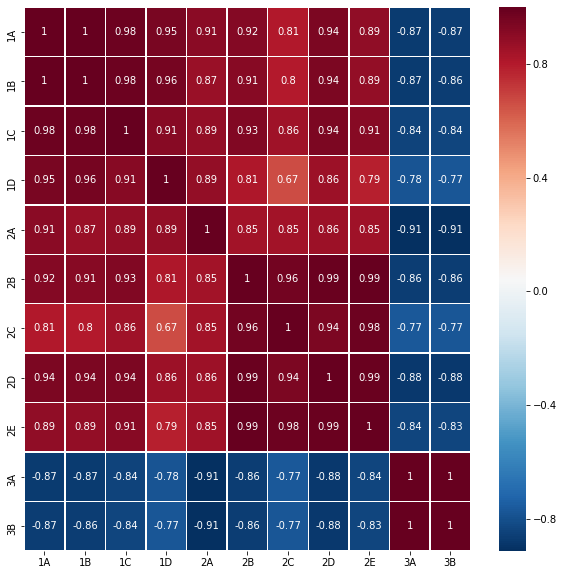

In [111]:
# Correlation using the pearson method
show_correlation_graph(data_f_corr, method="pearson")

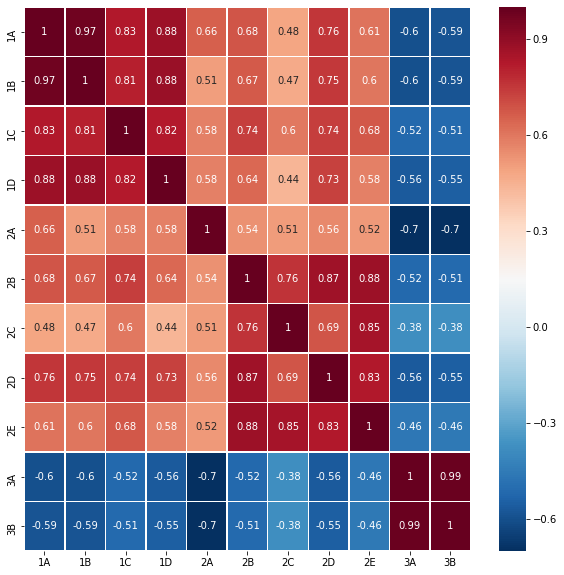

In [112]:
# Correlation using the kendall method
show_correlation_graph(data_f_corr, method="kendall")

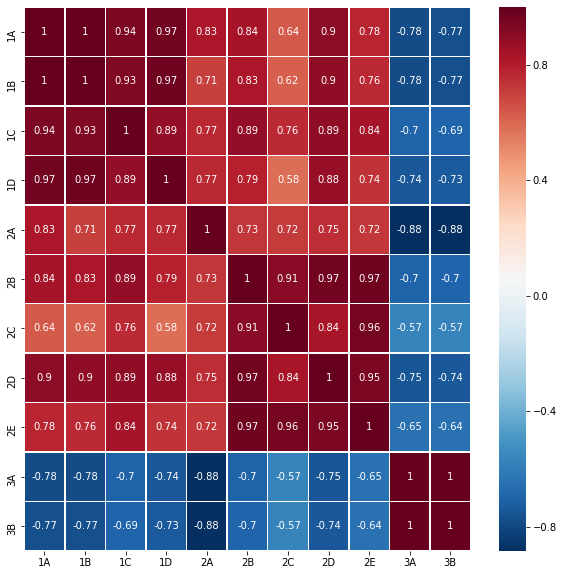

In [113]:
# Correlation using the spearman method
show_correlation_graph(data_f_corr, method="spearman")

We can see that in a general sense:

- the instruments 1A and 1B are extremely positively correlated
- the instruments 1A to 2E are very positively correlated
- the instruments 3A and 3B are both very negatively correlated with the other instruments but extremely highly correlated between each other


## Communication with Firestore

### Importing relevant libraries

In [18]:
import firebase_admin
from firebase_admin import credentials, firestore

### Identificating to Firebase

In [207]:
cred = credentials.Certificate("../identification/ngt-technical-test-firebase-adminsdk.json")
if (not len(firebase_admin._apps)):
    app=firebase_admin.initialize_app(cred)

fs_client = firestore.client()

In [36]:
def add_to_collection(collection_name, dic_list, fs_client):
    """Adds a list of dictionaries to a collection in firestore
    Considers that the firebase_admin app is already initialized and takes in argument the firestore client.
    
    collection_name: the collection name in Firestore
    dic_list: list of dicts
    fs_client: the firestore client object
    
    """
    
    doc_ref = fs_client.collection(collection_name)
    for d in dic_list:
        doc_ref.add(d)
    print("dic_list added to the collection", collection_name)
    

## Let's store the data checks in Firestore

### Let's start with the check that there's only 1 row for a given calculation date and instrument 

In [172]:
# We can use the same variable that was used before
# We can do it by calculation date, but let's do it for the whole dataset

check_no_duplicates=[{"check_no_duplicates":"OK" if data_grouped.NAV_Per_Share.max()==1 else "Not OK"}]


In [174]:
add_to_collection("check_no_duplicates", check_no_duplicates, fs_client)

dic_list added to the collection check_no_duplicates


### Then we add the daily check that NAV per share of the subscribed and redeemed are the same

In [ ]:
# We are only going to use a subset of the dates because it takes some time and resources to store everything in Firestore

In [179]:
add_to_collection("check_redeemed_subscribed",
    data.iloc[:100][["Valuation_Date"
                     , "Subfund_Code"
                     , "Share_Class_Code"
                     , "NAV_Per_Share_Redeemed_Subscribed_Check"]].to_dict("records"),
                  fs_client)
    

dic_list added to the collection check_redeemed_subscribed


## Let's store the correlations in Firestore

In [126]:
#Let's store the pearson correlation data of the instruments

#First let's recalculate it
corr = data_f_corr.corr(method="pearson")

#Then let's format it to put it in the function add_to_collection
d=corr.to_dict()
correlations=[]
for i1 in d:
    for i2 in d:
        correlations.append({"i1":i1, "i2":i2, "pearson_corr":d[i1][i2]})
#We store the data as a list of dictionnaries in the form {Instrument 1, Instrument 2, Pearson Correlation}
print(correlations[:10])


[{'i1': '1A', 'i2': '1A', 'pearson_corr': 1.0}, {'i1': '1A', 'i2': '1B', 'pearson_corr': 0.9992291093783222}, {'i1': '1A', 'i2': '1C', 'pearson_corr': 0.9848125968083348}, {'i1': '1A', 'i2': '1D', 'pearson_corr': 0.9526935721961813}, {'i1': '1A', 'i2': '2A', 'pearson_corr': 0.9051515329873916}, {'i1': '1A', 'i2': '2B', 'pearson_corr': 0.9184969578560321}, {'i1': '1A', 'i2': '2C', 'pearson_corr': 0.8095358963099001}, {'i1': '1A', 'i2': '2D', 'pearson_corr': 0.9433095835878668}, {'i1': '1A', 'i2': '2E', 'pearson_corr': 0.8922342275642468}, {'i1': '1A', 'i2': '3A', 'pearson_corr': -0.8729189419374123}]


In [127]:
# Adding to the collection "corrrelations"
add_to_collection("correlations", correlations, fs_client)

dic_list added to the collection correlations
